# Scratchpad

In [6]:
# imports 

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('co2-data.csv')

In [8]:
df = df[df['country'] == "United States"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 23305 to 23524
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             220 non-null    object 
 1   country                              220 non-null    object 
 2   year                                 220 non-null    int64  
 3   co2                                  220 non-null    float64
 4   consumption_co2                      29 non-null     float64
 5   co2_growth_prct                      219 non-null    float64
 6   co2_growth_abs                       219 non-null    float64
 7   trade_co2                            29 non-null     float64
 8   co2_per_capita                       220 non-null    float64
 9   consumption_co2_per_capita           29 non-null     float64
 10  share_global_co2                     220 non-null    float64
 11  cumulative_co2            

In [10]:
df.isna().sum()

iso_code                                 0
country                                  0
year                                     0
co2                                      0
consumption_co2                        191
co2_growth_prct                          1
co2_growth_abs                           1
trade_co2                              191
co2_per_capita                           0
consumption_co2_per_capita             191
share_global_co2                         0
cumulative_co2                           0
share_global_cumulative_co2              0
co2_per_gdp                             21
consumption_co2_per_gdp                191
co2_per_unit_energy                    165
coal_co2                                 0
cement_co2                             100
flaring_co2                            150
gas_co2                                 82
oil_co2                                 60
other_industry_co2                     190
cement_co2_per_capita                  100
coal_co2_pe

# Initital Thoughts
- I want to use the United States co2 data
- It looks like I can set a datetime index ?
- I will need to take care of null values and drop unneeded columns
- I have a population column that I can use in comparison / percantage
- I want to look at trends / impacts of co2 emmissions in the US
- I want to compare these trends / impacts to other values in my data to see if they are related / correlation
- I want to see if I can predict new trends /identifiers that contribute to increasing / decreasing co2 levels
- Impact of alternative fuel sources / wind / water / sun / electric ?

<AxesSubplot:>

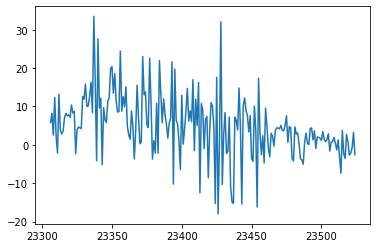

In [11]:
df.co2_growth_prct.plot()

<AxesSubplot:>

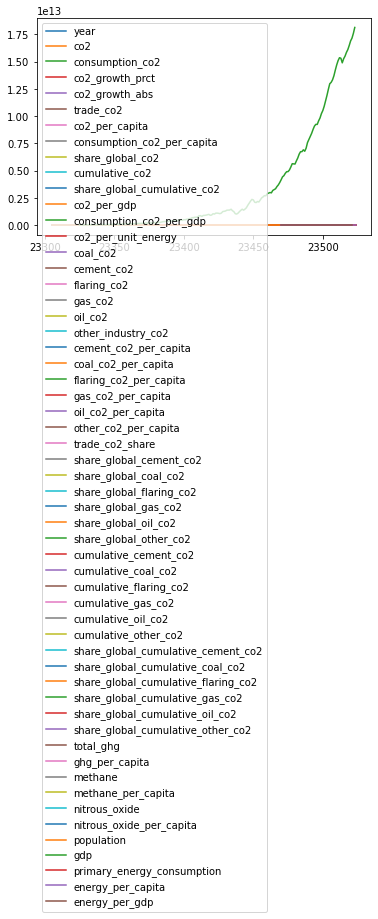

In [14]:
df.plot()